# First ML Model test in Kaggle

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:\\Users\\meghn\\Documents\\titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\meghn\Documents\titanic\gender_submission.csv
C:\Users\meghn\Documents\titanic\test.csv
C:\Users\meghn\Documents\titanic\train.csv


In [74]:
train_data = pd.read_csv("C:\\Users\\meghn\\Documents\\titanic\\train.csv")
train_data.head()
print(train_data.shape)

(891, 12)


In [76]:
test_data = pd.read_csv("C:\\Users\\meghn\\Documents\\titanic\\test.csv")
test_data.head()
print(test_data.shape)

(418, 11)


In [16]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [18]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [20]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [21]:
op = output["Survived"]
rate_op = sum(op)/len(op)

print("% of op who survived:", rate_op)

% of op who survived: 0.35406698564593303


In [22]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Second ML Model test in Kaggle

## Exploratory Data Analysis

In [1]:
# import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [3]:
#Loading the train data into dataframe
training_data = pd.read_csv("C:\\Users\\meghn\\Documents\\titanic\\train.csv")
print(training_data.shape)
training_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Describe the train data
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#fill the nullvalue with median age
training_data['Age'] = training_data['Age'].fillna(training_data['Age'].median())

<Axes: xlabel='Sex'>

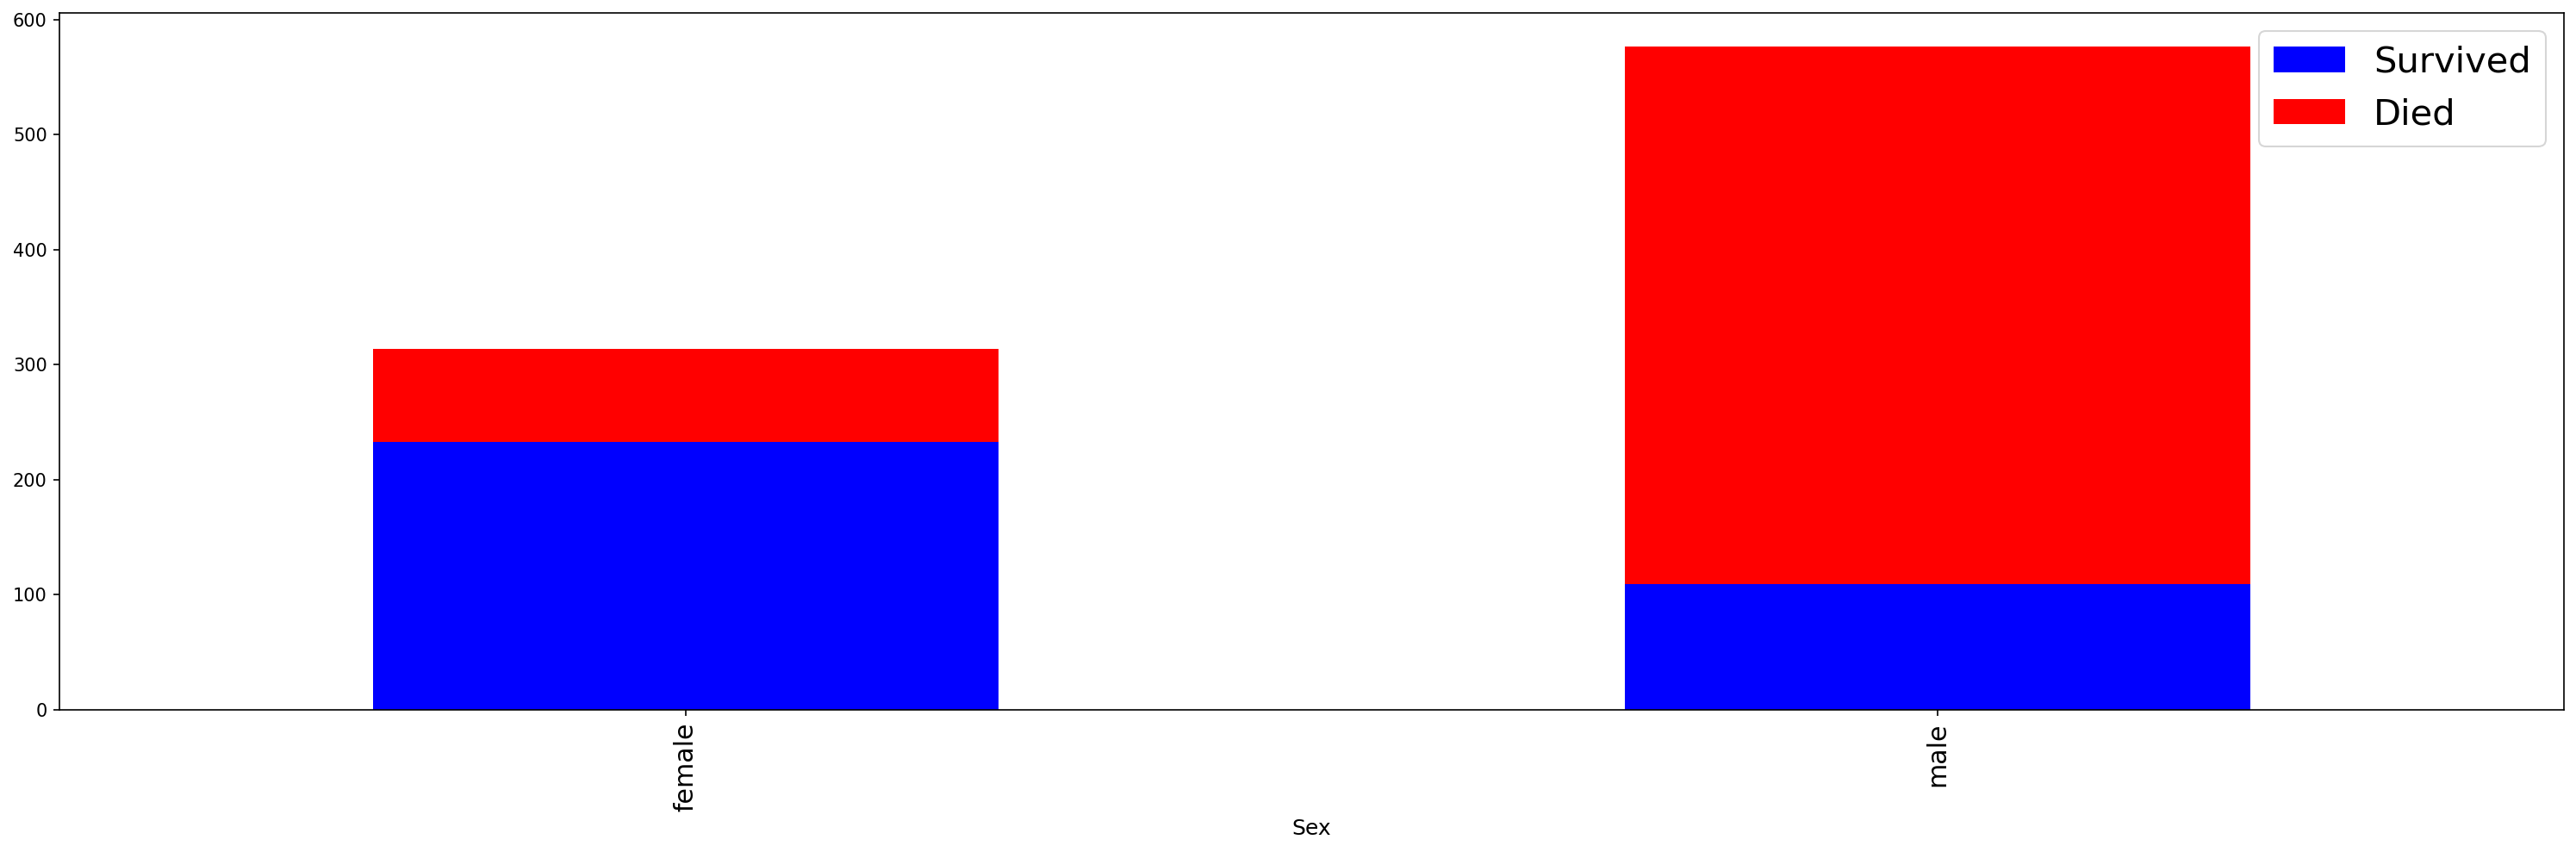

In [9]:
#visualize survival based on the gender
training_data['Died'] = 1 - training_data['Survived']
training_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['b','r'])

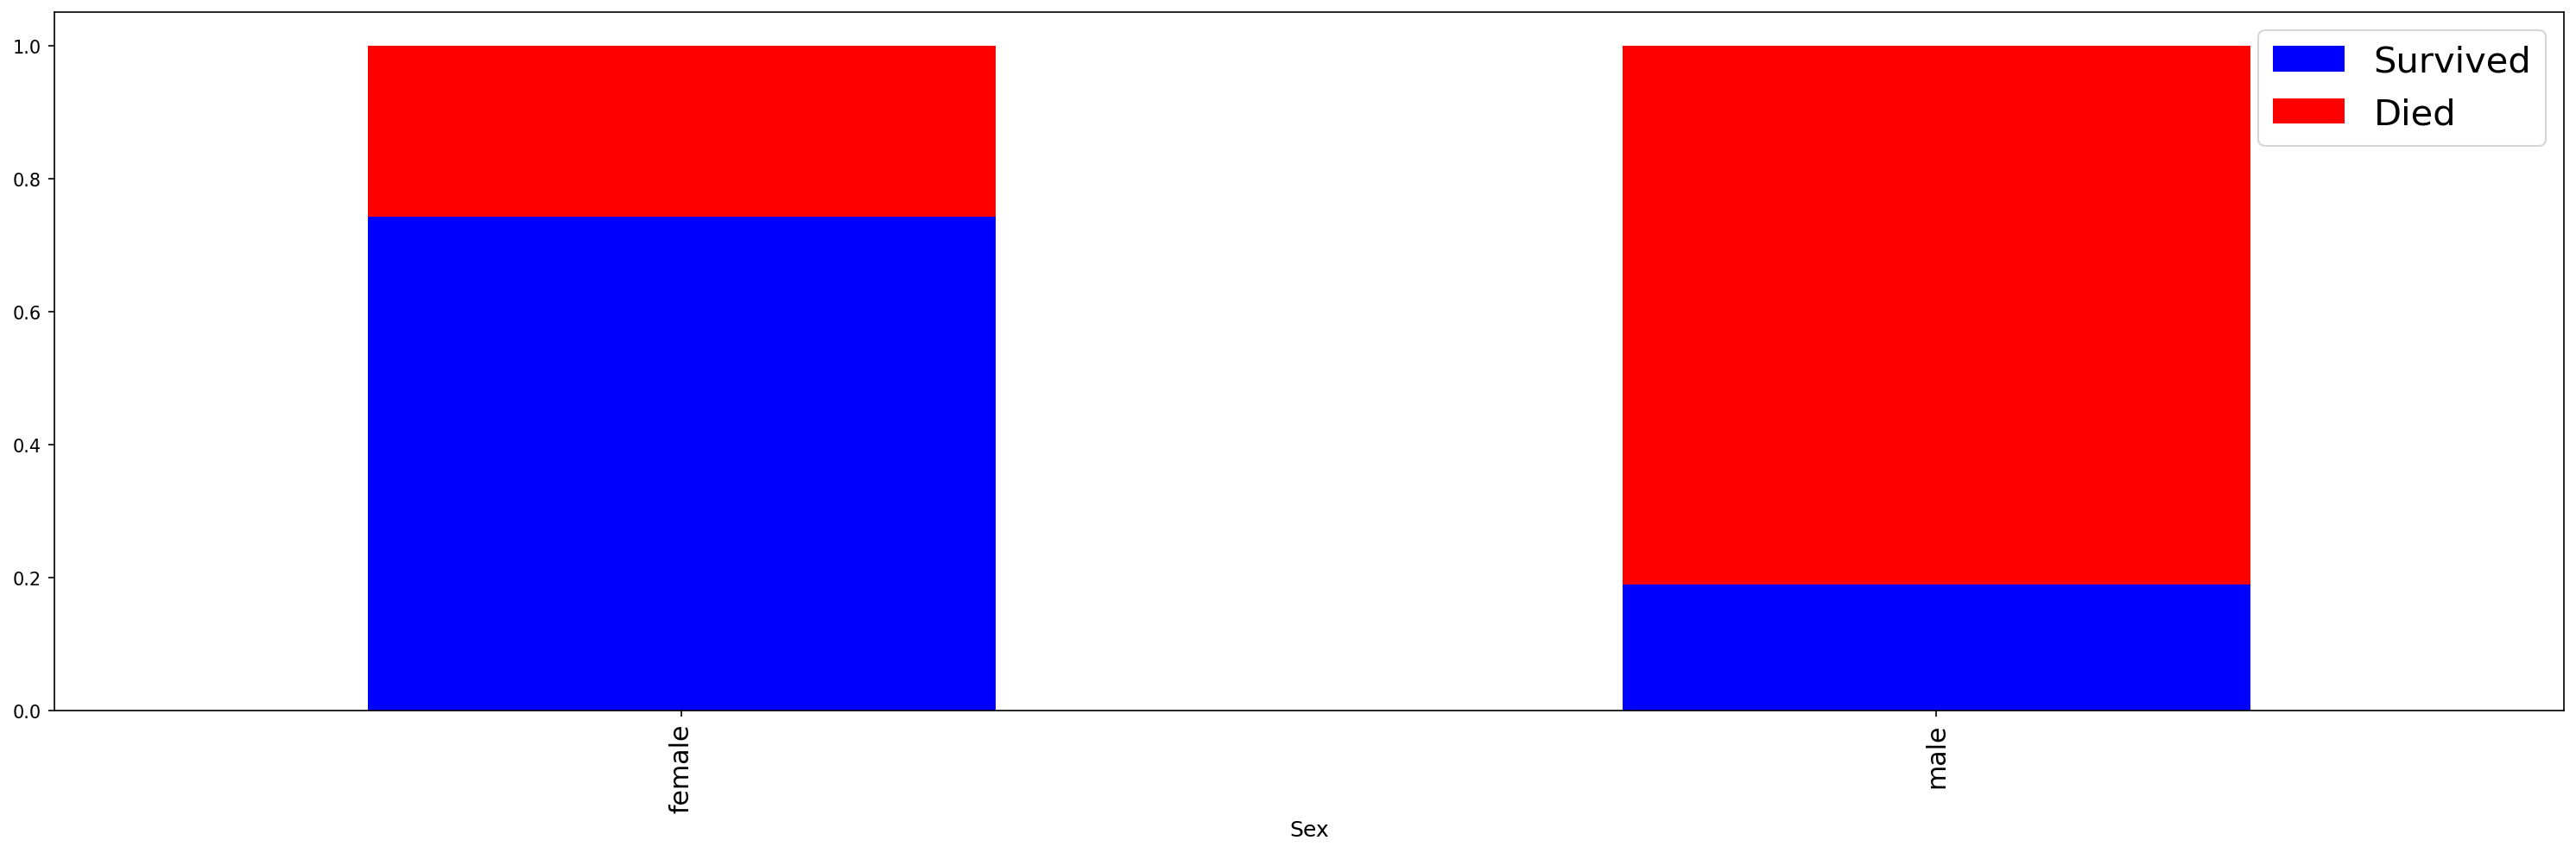

In [10]:
#plot the same graph but with ratio instead
training_data.groupby('Sex')[['Survived', 'Died']].mean().plot(kind='bar', figsize=(25, 7),   stacked=True, color=['b', 'r']);

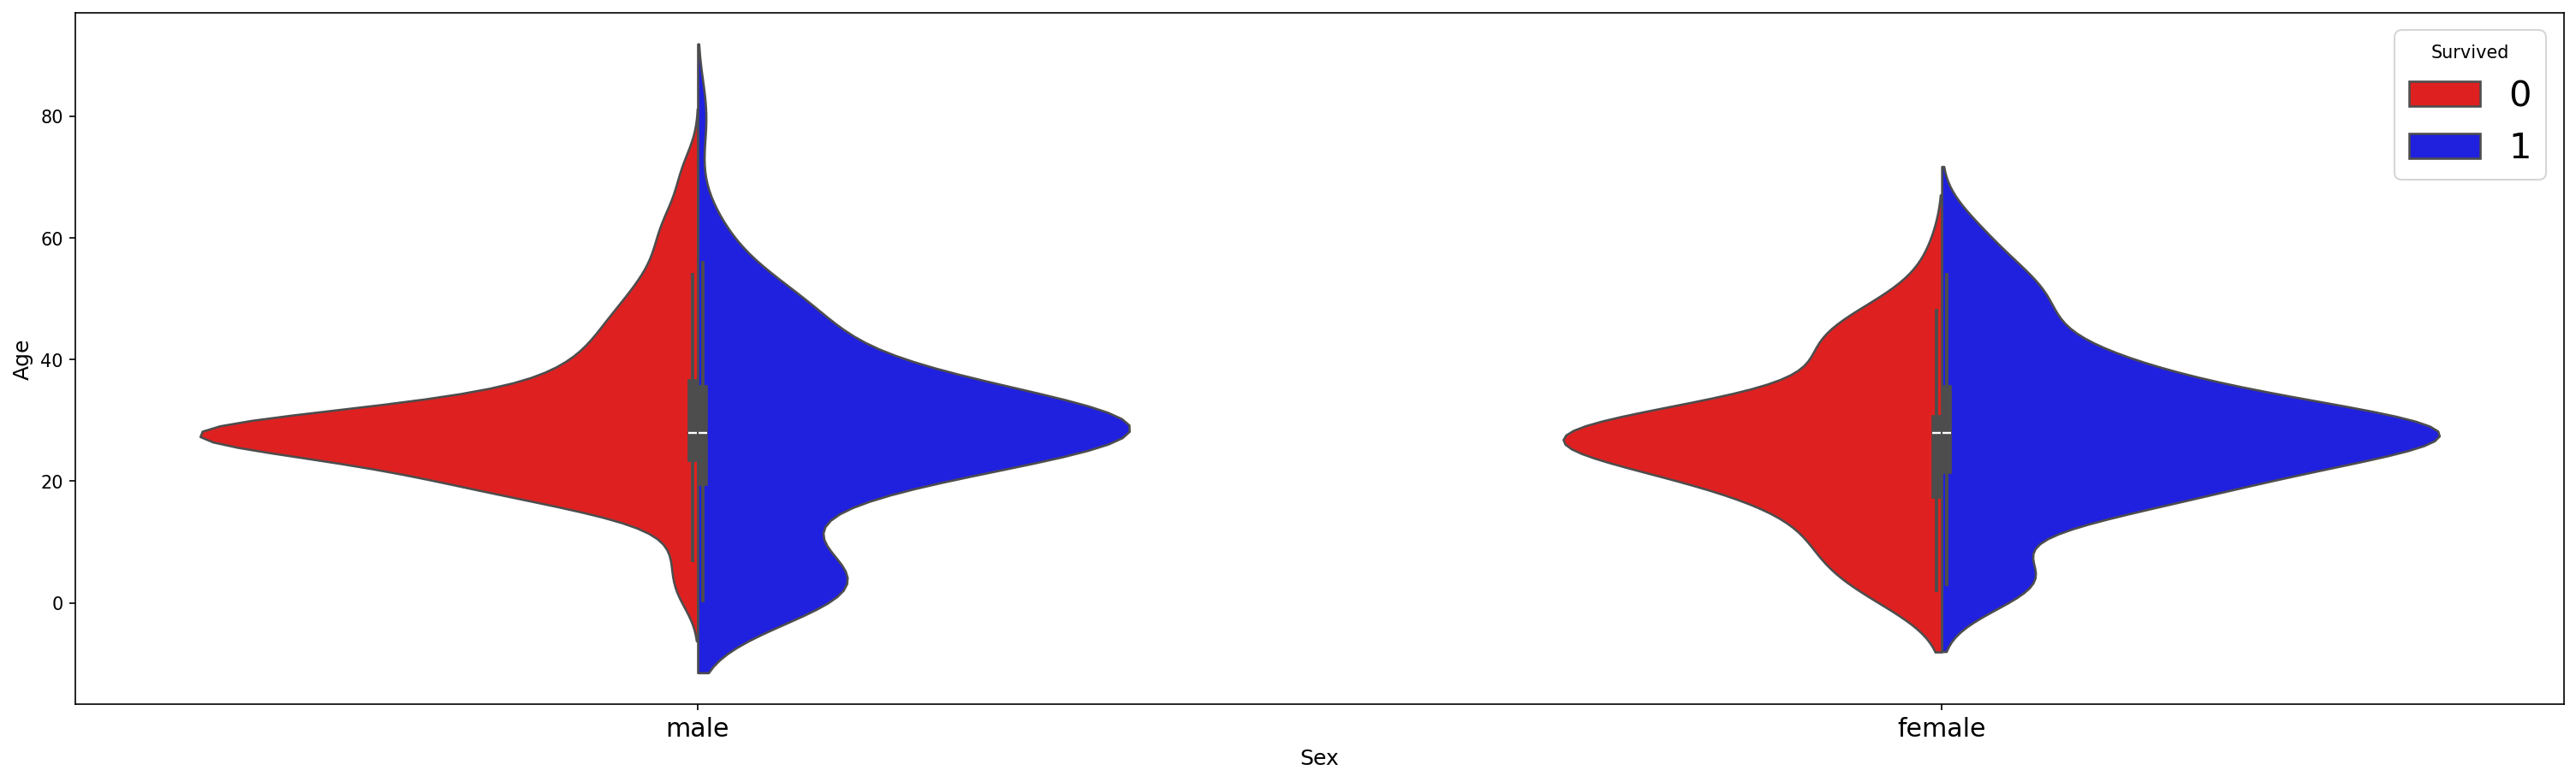

In [11]:
#correlate the survival with the age variable
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=training_data, 
               split=True,
               palette={0: "r", 1: "b"}
              );

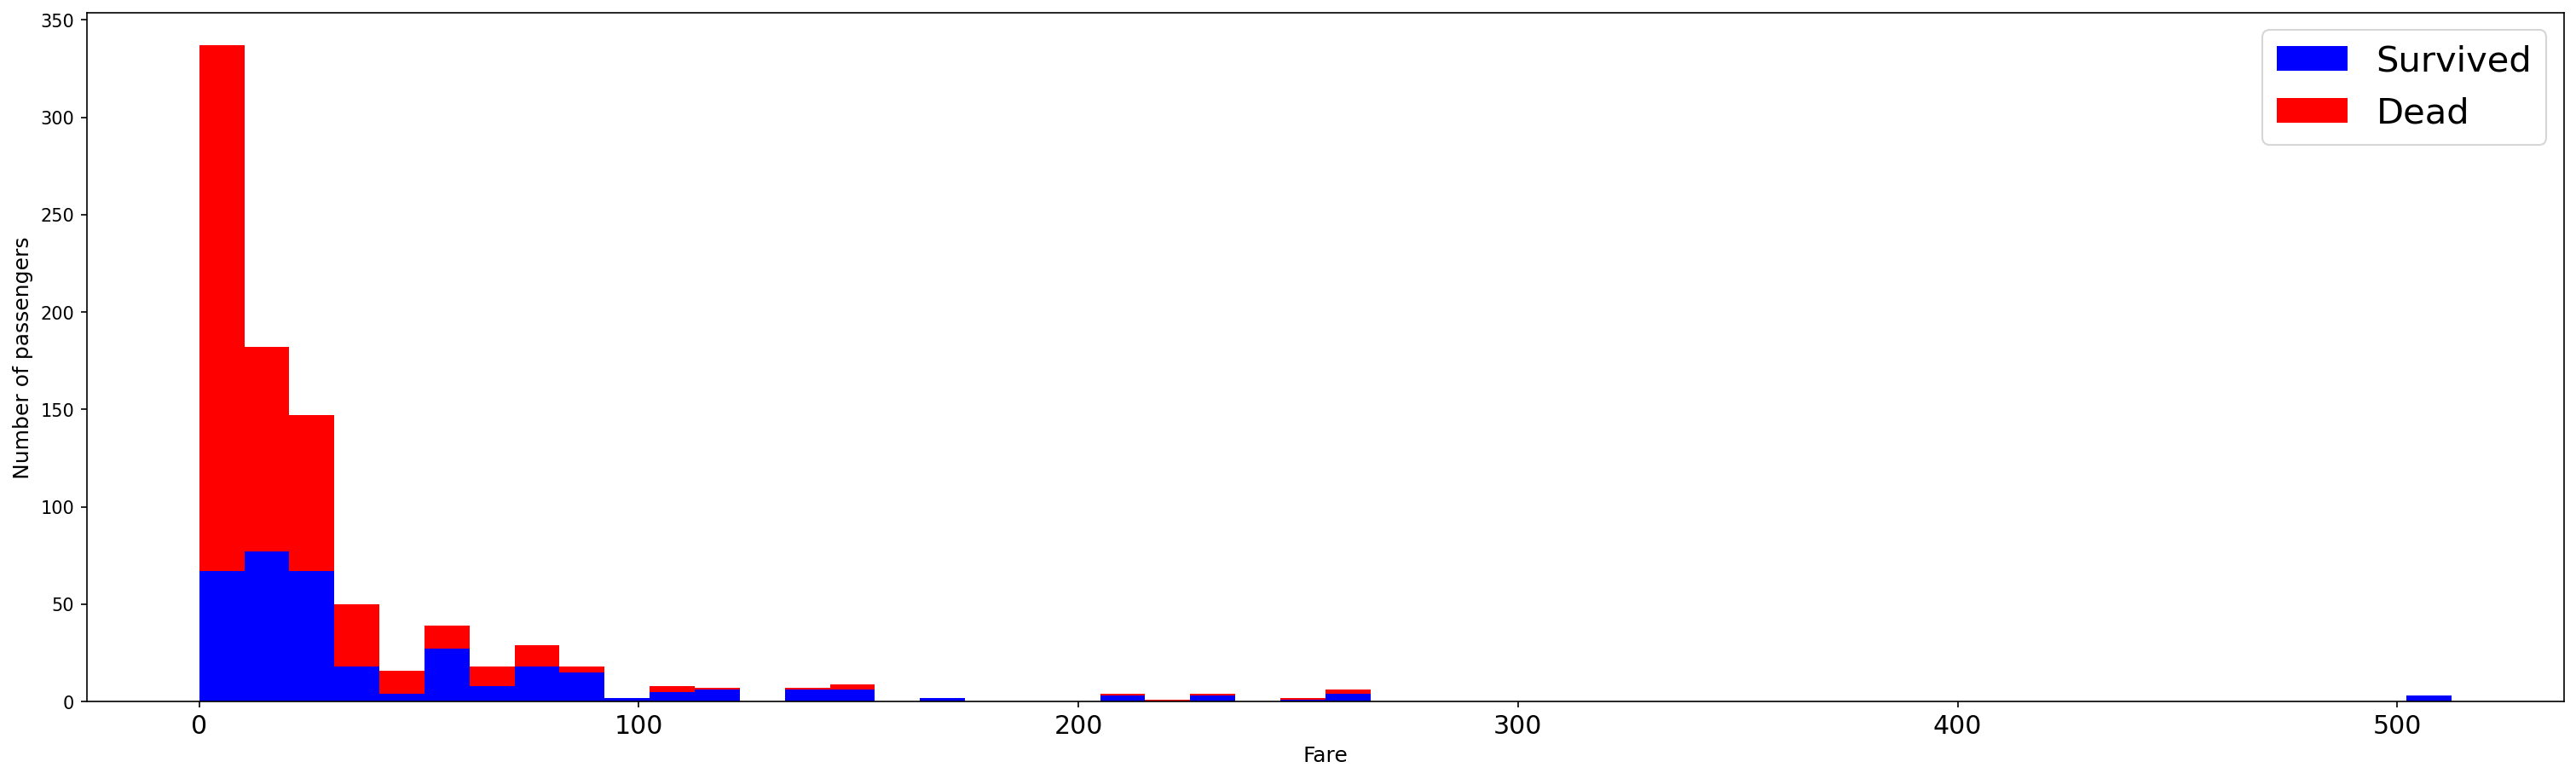

In [13]:
#how the fareticket impact the survival
figure = plt.figure(figsize=(25, 7))
plt.hist([training_data[training_data['Survived'] == 1]['Fare'], training_data[training_data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['b','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

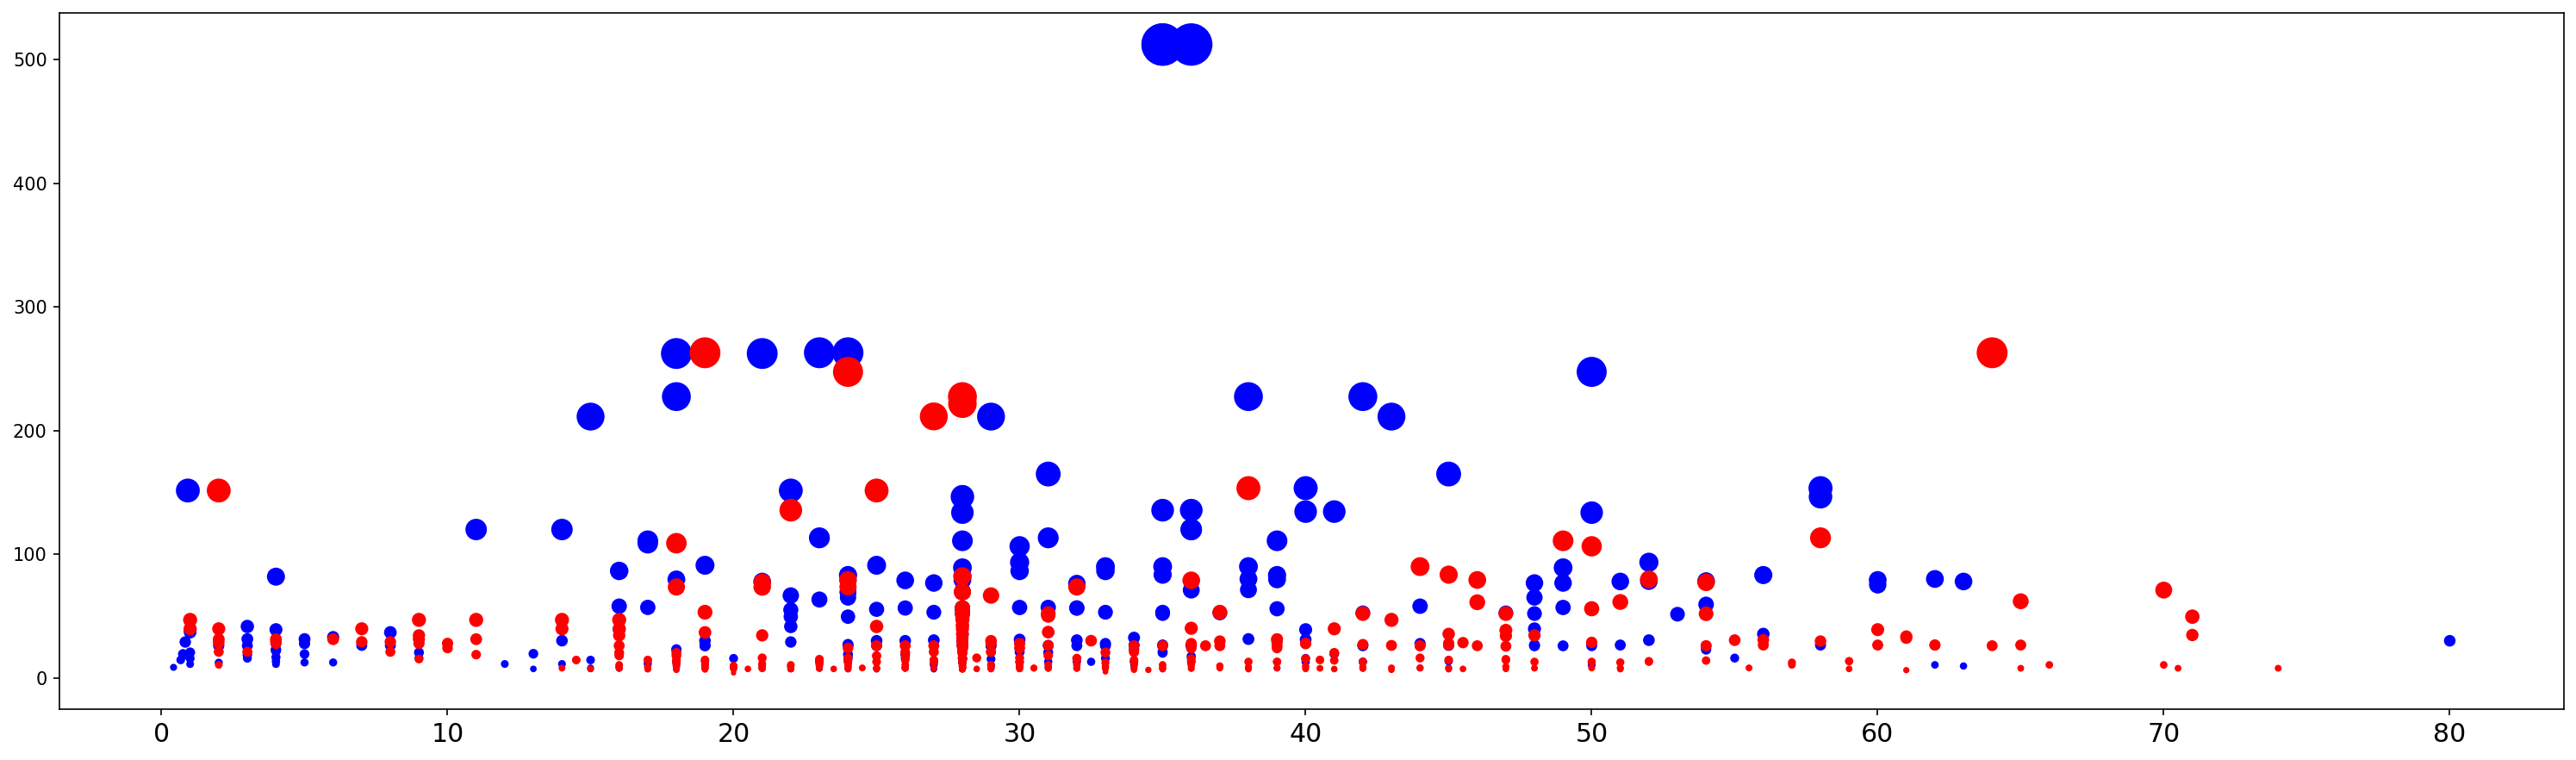

In [15]:
# now combine the age, the fare and the survival on a single chart
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(training_data[training_data['Survived'] == 1]['Age'], training_data[training_data['Survived'] == 1]['Fare'], 
           c='b', s=training_data[training_data['Survived'] == 1]['Fare'])
ax.scatter(training_data[training_data['Survived'] == 0]['Age'], training_data[training_data['Survived'] == 0]['Fare'], 
           c='r', s=training_data[training_data['Survived'] == 0]['Fare']);

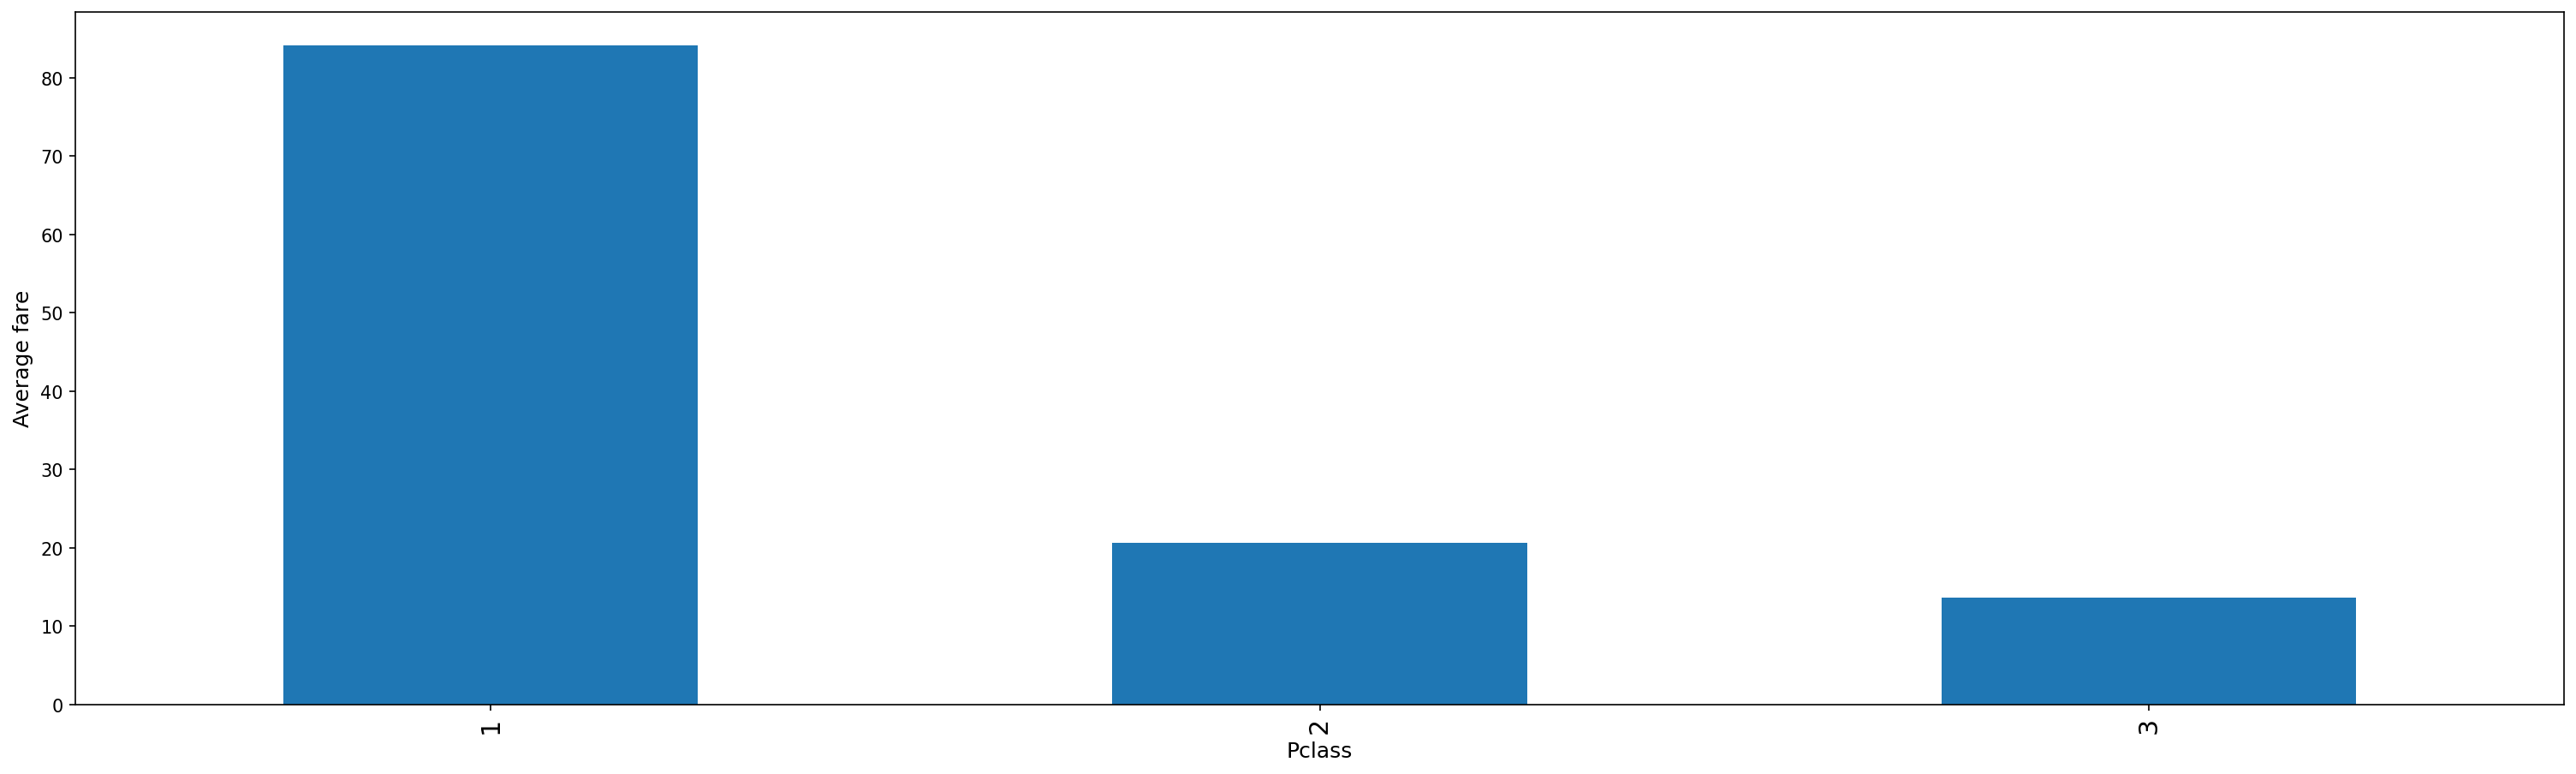

In [16]:
#let see ticket fare correlates with the class
ax = plt.subplot()
ax.set_ylabel('Average fare')
training_data.groupby('Pclass')['Fare'].mean().plot(kind='bar', figsize=(25, 7), ax = ax);

<Axes: xlabel='Embarked', ylabel='Fare'>

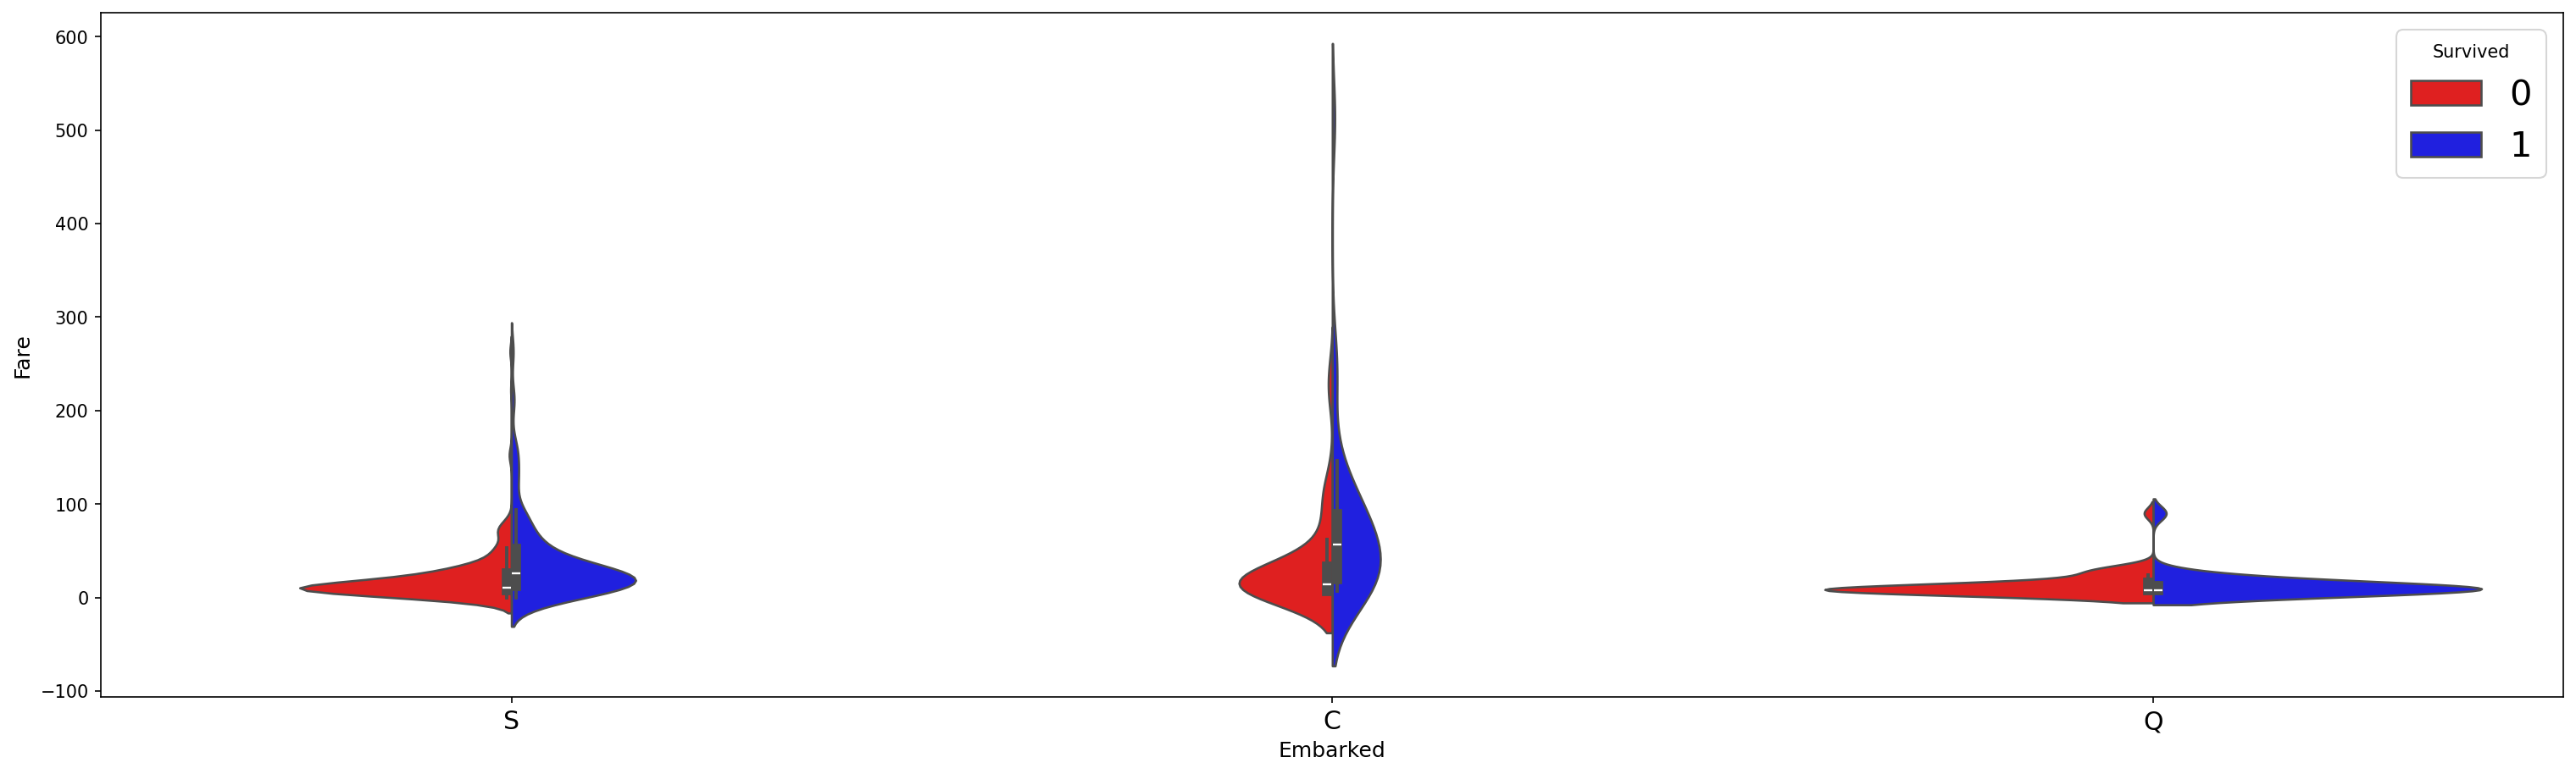

In [17]:
#how the embarkation site affects the survival
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=training_data, split=True, palette={0: "r", 1: "b"})

## Feature engineering

In [20]:
def status(feature):
    print('Processing', feature, ': ok')


### Loading Data

In [24]:
def get_combined_data():
    # reading train data
    training = pd.read_csv('C:\\Users\\meghn\\Documents\\titanic\\train.csv')
    
    # reading test data
    test = pd.read_csv('C:\\Users\\meghn\\Documents\\titanic\\test.csv')

    # extracting and then removing the targets from the training data 
    targets = training.Survived
    training.drop(['Survived'],axis=1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = pd.concat([training, test])
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

combined = get_combined_data()
print(combined.shape)

(1309, 10)


In [26]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting the passenger titles

In [32]:
titles = set()
for name in training_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

{'Ms', 'Mrs', 'Lady', 'Jonkheer', 'Don', 'Mme', 'Rev', 'Miss', 'Mlle', 'Mr', 'the Countess', 'Major', 'Capt', 'Dr', 'Sir', 'Master', 'Col'}


In [34]:
combined = get_titles()
combined.head()

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [36]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


### Processing age

In [39]:
#Number of missing age in train set
print(combined.iloc[:891].Age.isnull().sum())

177


In [41]:
#Number of missing age in test set
print(combined.iloc[891:].Age.isnull().sum())

86


In [43]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median(numeric_only=True)
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [45]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined


In [47]:
combined = process_age()

Processing age : ok


### Processing Names

In [50]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [52]:
combined = process_names()

combined.head()

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,False,False
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,True,False,False
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,False,False
3,1,female,35.0,1,0,113803,53.1000,C123,S,False,False,False,True,False,False
4,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,False,False


### Processing the Fares

In [55]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [57]:
combined = process_fares()
combined.head()

Processing fare : ok


C:\Users\meghn\AppData\Local\Temp\ipykernel_26016\1942251222.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,False,False
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,True,False,False
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,False,False
3,1,female,35.0,1,0,113803,53.1000,C123,S,False,False,False,True,False,False
4,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,False,False


### Processing Embarked

In [60]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [62]:
combined = process_embarked()

combined.head()

Processing embarked : ok


C:\Users\meghn\AppData\Local\Temp\ipykernel_26016\1274712313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined.Embarked.fillna('S', inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,False,False,False,False,True
1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,False,False,True,False,False,True,False,False
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,False,False,False,False,True
3,1,female,35.0,1,0,113803,53.1000,C123,False,False,False,True,False,False,False,False,True
4,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,False,False,False,False,True


### Processing Cabin

In [65]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
# set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U', 'T'])

print(test_cabin)
# set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U'])

{'B', 'D', 'U', 'T', 'C', 'G', 'F', 'A', 'E'}
{'B', 'D', 'U', 'C', 'G', 'F', 'A', 'E'}


In [67]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [69]:
combined = process_cabin()
combined.head()

Processing cabin : ok


C:\Users\meghn\AppData\Local\Temp\ipykernel_26016\756963061.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined.Cabin.fillna('U', inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,1,female,38.0,1,0,PC 17599,71.2833,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,1,female,35.0,1,0,113803,53.1000,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,3,male,35.0,0,0,373450,8.0500,False,False,True,...,True,False,False,False,False,False,False,False,False,True


### Processing Sex

In [72]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [74]:
combined = process_sex()

Processing Sex : ok


### Processing Pclass

In [77]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [79]:
combined = process_pclass()

Processing Pclass : ok


### Processing Ticket

In [82]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))
#37


def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','') #PC 2222
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

combined = process_ticket()

37
Processing Ticket : ok


### Processing Family

In [85]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

In [87]:
combined = process_family()

print(combined.shape)
combined.head()

Processing family : ok
(1309, 67)


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,False,False,True,False,False,...,False,False,False,False,False,False,2,0,1,0
1,0,38.0,1,0,71.2833,False,False,False,True,False,...,False,False,False,False,False,False,2,0,1,0
2,0,26.0,0,0,7.9250,False,True,False,False,False,...,True,False,False,False,False,False,1,1,0,0
3,0,35.0,1,0,53.1000,False,False,False,True,False,...,False,False,False,False,False,True,2,0,1,0
4,1,35.0,0,0,8.0500,False,False,True,False,False,...,False,False,False,False,False,True,1,1,0,0


## Modeling

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [239]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [243]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('C:\\Users\\meghn\\Documents\\titanic\\train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()

In [245]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

<Axes: ylabel='feature'>

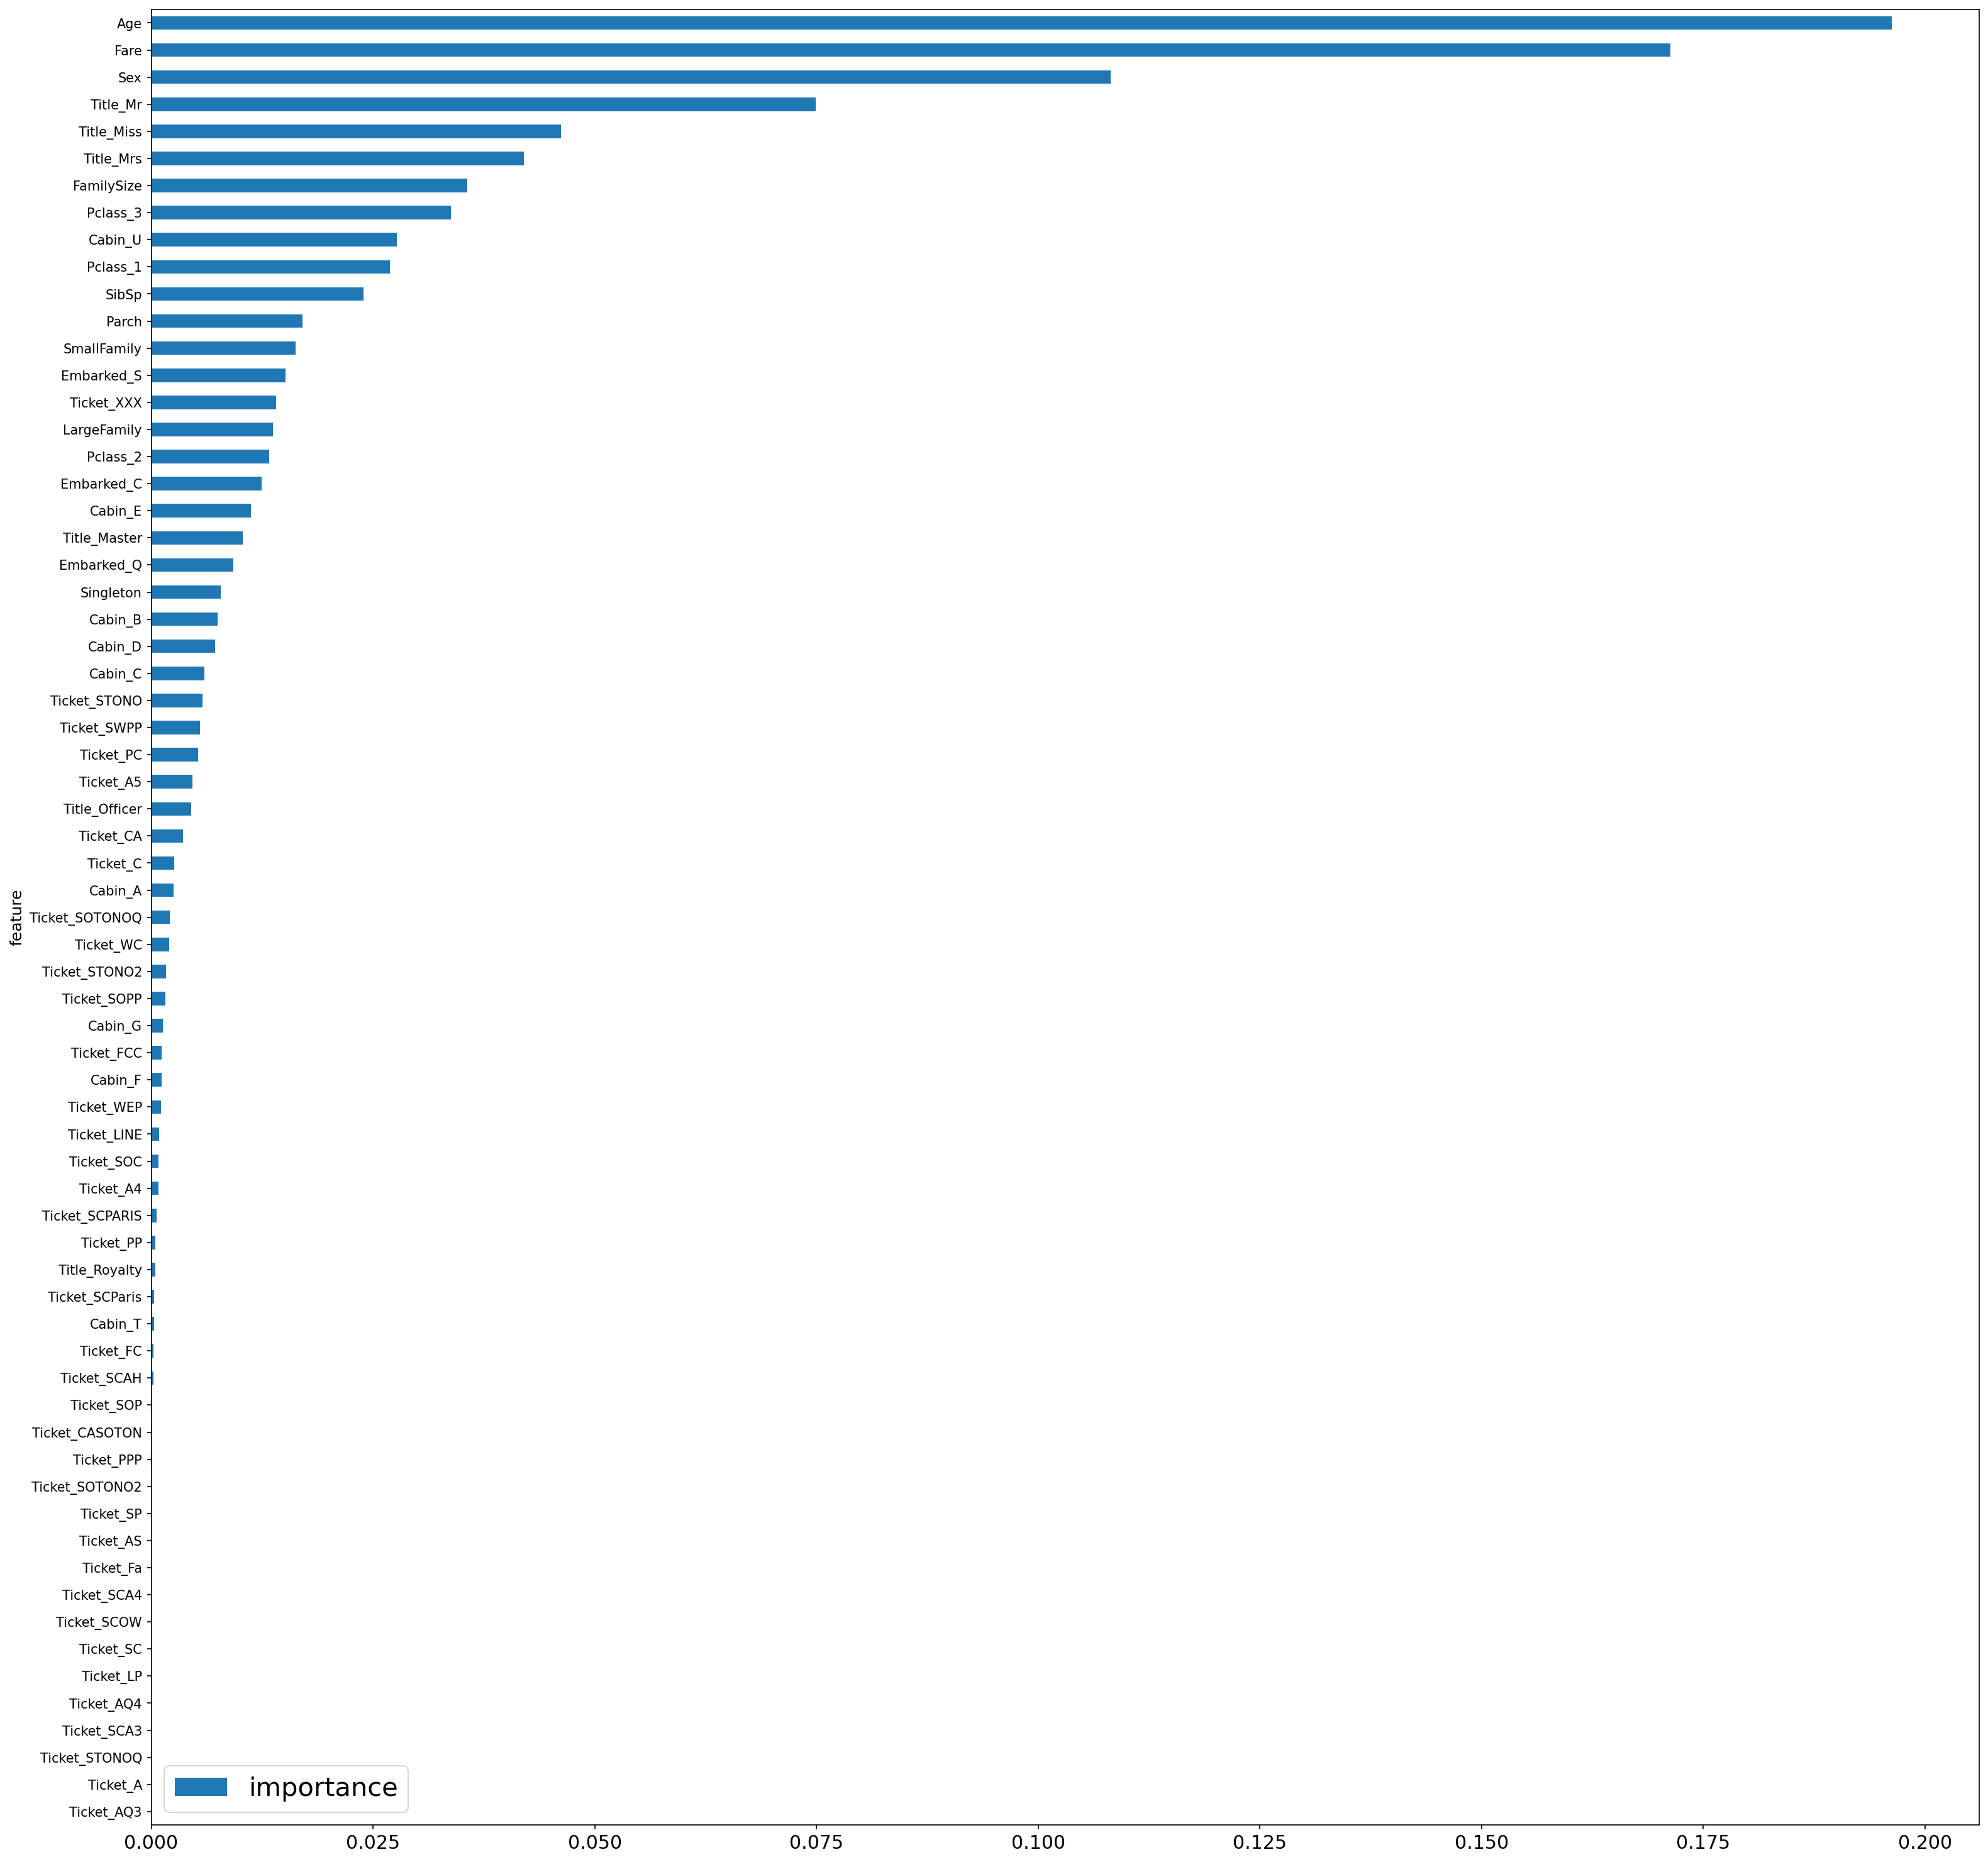

In [247]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [249]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)
# (891L, 14L)

test_reduced = model.transform(test)
print(test_reduced.shape)
# (418L, 14L)

(891, 14)
(418, 14)


C:\Users\meghn\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\meghn\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Trying different models 

In [251]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\Users\meghn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\meghn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CV score = 0.8181721172556651
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


C:\Users\meghn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\meghn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CV score = 0.8181721172556651
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8047329106772958
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8305316678174629
****


### Hyper Parameters Tunning

In [253]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [257]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('C:\\Users\\meghn\\Documents\\titanic\\test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('C:\\Users\\meghn\\Documents\\titanic\\gridsearch_rf.csv', index=False)